# Teste 01 - Clusterização 
<h4 align="center"> 
	🚀 Desafio Data Science - Questão 01 🚀 Finalizado ✅
</h4>

## Desenvolvido por:
<a href="https://github.com/vivianerenizia">
 <img style="border-radius: 50%;" src="https://avatars1.githubusercontent.com/u/31120743?s=400&u=a84a58b76a93373ab0581f3f5f04a8edb21f92e9&v=4" width="100px;" alt=""/>
 <br />
 <sub><b>Viviane Renizia</b></sub></a> <a href="https://github.com/vivianerenizia" title="Rocketseat"></a>
 <br />
 
 ## Desenvolvimento:

In [1]:
#Bibliotecas necessárias

import pandas as pd #análise e visualização dos dados
from matplotlib import pyplot as plt #para plotar os gráficos
import numpy as np #para manipular os vetores
from sklearn.cluster import KMeans #para usar o KMeans

In [2]:
s1 = pd.read_fwf('s1.txt', header=None) #Cria variável s1 que armazena a leitura do txt, o header indica que não há cabeçalho para as colunas

In [3]:
s1

,0,1
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046
...,...,...
4995,665426,853940
4996,691827,863963
4997,650661,861267
4998,599647,858702


In [4]:
s1.shape #mostra a quantidade de linhas e colunas

(5000, 2)

In [5]:
s1.isna().sum() #0 e 1 cabeçalho das colunas e a frente o numero de dados faltantes

0    0
1    0
dtype: int64

In [6]:
s1.info() #Informações acerca do dataset, tipos, por exemplo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       5000 non-null   int64
 1   1       5000 non-null   int64
dtypes: int64(2)
memory usage: 78.2 KB


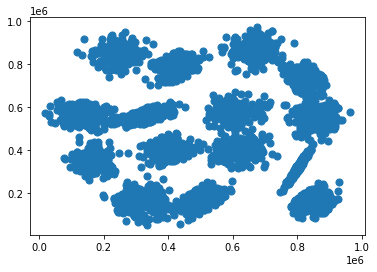

In [7]:
plt.scatter(s1[0][:], s1[1][:], s=50) #plotando mapa de dispersão com todos os valores das linhas e das colunas. 
#s1[0]->x s1[0]->y. Com : é possível pegar todos as linhas, evitando um for
plt.show() #apenas para visualização do gráfico

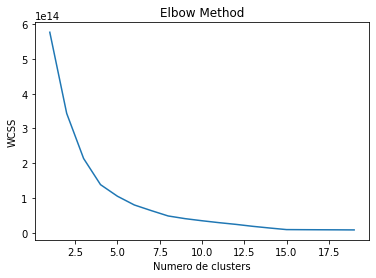

In [8]:
wcss = [] #soma dos quadrados das distâncias de cada ponto de dados em todos os clusters até seus respectivos centróides. A ideia é minimizar a soma.
num_iteracoes=20; #quantidade de clusters pra testar
for i in range(1, num_iteracoes): #for que vai até o numero de iterações definido
    kmeans = KMeans(n_clusters=i, init='k-means++') #variavel kmeans armazena a criação do classificador kmeans
    #Kmeans++ ->  seleciona os centros do cluster inicial para o cluster k-mean de uma forma inteligente para acelerar a convergência
    kmeans.fit(s1) #fit -> realiza o treino do kmeans, calcula o agrupamento de k-means.
    wcss.append(kmeans.inertia_) #append -> adiciona itens ao final da lista, nesse caso, adiciona a inercia ao final do wcss
    #inertia -> Soma das distâncias ao quadrado das amostras até o centro do cluster mais próximo, quanto menor a inercia mais bem agrupados os dados vão estar
plt.plot(range(1, num_iteracoes), wcss) #range -> retorna sequencia de numeros no intervalo definido, eixo x. wcss é o eixo y
plt.title('Elbow Method') #Elbow roda o KMeans para vários quantidades diferentes de clusters e dize qual dessas quantidades é o número ótimo de clusters.
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
for i in range(len(wcss)): #for percorrenco de 1 até o tamanho (através do len) da wcss
    print(f'Cluster{i+1}: {wcss[i]}') #imprimindo o numero do cluster e o resultado da inertia.

Cluster1: 576807041183705.5
Cluster2: 343183772884477.06
Cluster3: 213510836239204.28
Cluster4: 138251059781513.55
Cluster5: 104935701880790.95
Cluster6: 79769282312091.47
Cluster7: 63579905604814.125
Cluster8: 48150402085148.43
Cluster9: 40427804017854.27
Cluster10: 34392201182177.574
Cluster11: 28911772976059.688
Cluster12: 23985084307490.19
Cluster13: 18350097358136.46
Cluster14: 13487085594807.37
Cluster15: 8917659579893.602
Cluster16: 8649825559616.616
Cluster17: 8425974513636.299
Cluster18: 8231083909137.172
Cluster19: 7992669319217.751


### Com o gráfico do Elbow Method e os dados da inercia de cada cluster é possível perceber que ao atingir o números de 15 clusters, não há mais mudanças relevantes, portanto, 15 clusters é a quantidade ótima de clusters para esse caso.

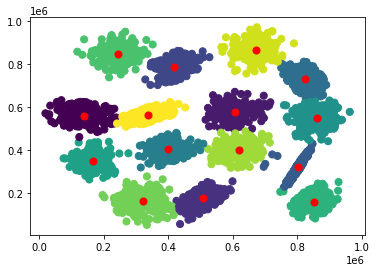

In [10]:
kmeans = KMeans(n_clusters=15) #variavel kmeans armazena a criação do classificador KMeans com o número pré definido de clusters.
pred_y = kmeans.fit_predict(s1) #variavel pred_y recebe o fit_predict que calcule centros de cluster e prevê o índice de cluster dos dados.
y_kmeans = kmeans.predict(s1) #variavel y_kmeans recebe o resultado do agrupamento através do método predict.

plt.scatter(s1[0][:], s1[1][:], c=y_kmeans, s=50) #plotando mapa de dispersão com todos os valores das linhas e das colunas. 
# s1[0]->x s1[0]->y. Com : é possível pegar todos as linhas, evitando um for
# c define uma oor para cada cluster de acordo com o agrupamento
# s define o tamanho dos pontos de cada elemento dos clusters 
centers=kmeans.cluster_centers_ #variavel centers salva a coordenada de cada centróide
plt.scatter(centers[:,0], centers[:,1], c='red', s=50) #plotando mapa de dispersão com as coordenadas x,y de cada centro
# s define o tamanho do ponto que marcará o centro.
plt.show()